# 3.1 Drift Diffusion Models

## Introduction

There is an old philosophical thought experiment that illustrates indecision: a donkey placed equidistant between two piles of hay will starve to death because it cannot choose between them ([Budiran's Ass](https://en.wikipedia.org/wiki/Buridan%27s_ass)). This scenario, while hypothetical, highlights the importance of decision-making mechanisms. A computational model of this behavior could even be demonstrated using a simple tree stump to represent the donkey. Notably, if the donkey’s decision-making process incorporated some degree of noise or randomness, it would ultimately have chosen a pile and survived. Real-world decisions are rarely so static; they are complex, dynamic processes that evolve over time, offering far more intriguing opportunities for modeling than a scenario of perpetual indecision.

How many decisions do you make each day? Depending on your perspective and the criteria for defining a decision, the number could range from hundreds to thousands. How about a squirrel? Likely, a squirrel makes even more decisions—being in constant motion as it forages, evades predators, and navigates the four fundamental drivers of survival: feeding, fighting, fleeing, and reproduction. Like humans, animals continuously make decisions throughout their waking lives, evaluating evidence across multiple dimensions and timescales. Although human decision-making often involves reason and the capacity to consider vastly more dimensions and extended timescales, studying simpler decision-making processes provides an essential starting point. Interestingly, many of our simpler decisions might rely on the same neural mechanisms that evolved in our near and distant ancestors.

### Why are drift diffusion models useful?

Decisions typically involve two or more options, one of which is correct or better than the others.  Decision making performance can be quantified in terms of accuracy (how often the correct or best option chosen) as well as speed (how long it takes to decide).  Accuracy and speed are typically at odds -- deciding faster means making more errors (a "speed/accuracy tradeoff" explored in this lab).  We can evaluate decision making in terms of speed, accuracy, and reward.

Drift diffusion models use mathematics originally developed in physics.  You start with a particle of gas in a confined space that jitters from Brownian motion (noise), then add a direction of motion to the air surrounding the particle (drift rate), and explore the time course of how the particle moves and when it is statistically likely to move a particular distance (cross a threshold).  The same parameters can be mapped onto key elements of decision making, replacing the particle with an undecided state, e.g. equidistant between two decision options (thresholds), the motion of air instead becomes the accumulation of evidence moving toward either of the options, and crossing a threshold is making a decision.  These simple parameters allow us to explore decision making speed and accuracy in considerable detail.  For example, we can define the optimal balance between speed and accuracy to maximize reward.  With optimality operationalized it is then possible to evaluate behavioral performance in terms of distance from optimal (the closer to optimal the better, of course).       

The required readings for this week are especially informative and relevant. Here's the link to Bogacz et al.: https://sites.engineering.ucsb.edu/~moehlis/moehlis_papers/psych.pdf

As Bogacz et al. (2006, see [additional resources]({{ base_url }}/content/Decision%20Making/intro.md#additional-resources)) explain,

"It has been known since Hernstein’s (1961, 1997) work that animals do not achieve optimality under all conditions, and in behavioral economics, humans often fail to choose optimally (e.g., Kahneman & Tversky, 1984; Loewenstein & Thaler, 1989). For example, in selecting among two items of comparable value and a cash payment worth less than either, participants often opt for cash, possibly to avoid a harder decision between two more valuable but similar items (Shafir & Tversky, 1995). **Such findings raise important questions: Is human decision making always suboptimal?** If it is not, under what conditions is it optimal? When it is suboptimal, does this reflect inherent deficiencies in decision-making mechanisms or other sources of systematic bias? Answers to such questions may provide insights into underlying neural mechanisms. However, to consider them, one must first describe optimal performance, against which actual behavior can be compared."

**Installation and Setup**

In [2]:
# %%capture
# %pip install psyneulink

import matplotlib.pyplot as plt
import psyneulink as pnl
import numpy as np
import pandas as pd

## The Two Alternative Forced Choice (2AFC / TAFC) Task

The simplest form of decision making involves only two options (A OR B, deliberately excluding options of neither nor both). We refer to this scenario as the *Two Alternative Forced Choice* (2AFC / TAFC) Task. Some survival-relevant examples of 2AFC are explore vs. exploit, and fight vs. flight. A common lab 2AFC task involves lots of dots moving on a screen (Random dot kinematogram, RDK). Some are moving leftward and some are moving rightward. The participant's task on each trial is to determine which direction has more motion, LEFT or RIGHT. The experimenter can manipulate the amount of evidence available: 51% left / 49% right is difficult, while 99% left / 1% right is very easy. It is a good experiment for manipulating task difficulty and measuring performance. Experimenters can also vary the reward rate for correct trials (and/or penalty rate for incorrect trials) and the time delay between trials. All of these experimental parameters can be accounted for in a drift diffusion model.    

Drift diffusion models (DDMs) allow you to simulate behavioral performance on a 2AFC task -- adjusting the parameters can produce data that are more-or-less indistinguishable from human performance on a variety of 2AFC tasks. Below is a simple diagram of how the DDM works. Imagine, a human has to respond to a RDK showing most a dots moving to the left. They have to make a decision between "left" (correct response) "right" (wrong response). In this example, the human sees the stimulus (*stimulus onset*), and then takes some time to process that visual information. Basic visual processing at the start of a trial and motor response processing at the end of a trial (as opposed to decision-relevant processing) is grouped together and called *non-decision time* (all depicted at the start of the trial in the diagram below). Once the stimulus is perceived, the agent accumulates evidence about the stimulus until it reaches a *threshold* and is sufficiently confident to choose decision 1 or decision 2. Overall the evidence drifts towards one or the other decision (in this example, typically to the correct response) with a specific *drift rate* that is dependent on the task difficulty (easier tasks have higher drift rates). In addition, this is a noisy process that unfolds over time so there is some variability in how long it takes the agent to accumulate sufficient evidence to make decisions.

![Drift Diffusion Model](https://princetonuniversity.github.io/NEU-PSY-502/_static/images/ddm.png)

### To err on the side of caution or respond quickly?

How do you know how quickly to respond? Bogacz et al. (2006) state,

"The DDM is optimal in the sense that it is the fastest decision maker for a given level of accuracy. This assumes a fixed decision threshold, yet the model does not specify what this should be. Absent noise, thresholds have no effect on accuracy. However, with noisy data, accuracy increases as thresholds and decision times (DTs) rise because there is more time to average out uncorrelated noise. This produces a speed–accuracy trade-off: Lower thresholds produce faster but less accurate responding, whereas higher thresholds produce more accurate but slower responses. This speed–accuracy trade-off is critical for interpreting the results of most psychological experiments (Pachella, 1974; Wickelgren, 1977). For example, a manipulation intended to influence task difficulty, and thereby accuracy, could instead simply induce a change in response threshold, thereby changing RTs."

#### Exercise 1{exercise}

In your own words, define the following terms:

1. Decision threshold
2. The speed/accuracy tradeoff
3. Is this correct: The higher the decision threshold, the faster the decision is made?
4. Is this correct: The higher the decision threshold, the more accurate the decision is?



Solution 1{solution}

1. The decision threshold is the amount of evidence that must be accumulated before a decision is made. If the evidence reaches the threshold for decision 1, the agent will choose decision 1. If the evidence reaches the threshold for decision 2, the agent will choose decision 2. The decision threshold is a parameter that can be manipulated through factors like the reward for being accurate on any given trial.
2. The speed/accuracy tradeoff is the relationship between how quickly a decision is made and how accurate that decision is. In general, the faster a decision is made, the less accurate it is. Conversely, the more accurate a decision is, the longer it takes to make that decision. The speed/accuracy tradeoff is a fundamental aspect of decision-making that can be manipulated through the decision threshold parameter in the drift diffusion model.
3. No, this is not correct. The higher the decision threshold, the slower the decision is made. This is because more evidence must be accumulated before a decision is made. Conversely, the lower the decision threshold, the faster the decision is made. This is because less evidence must be accumulated before a decision is made.
4. Yes, this is correct. The higher the decision threshold, the more accurate the decision is. This is because more evidence must be accumulated before a decision is made, which means that the agent is more confident in their decision. Conversely, the lower the decision threshold, the less accurate the decision is. This is because less evidence must be accumulated before a decision is made, which means that the agent is less confident in their decision.

As Bogacz et al. (2006) explain, 
    
"..the TAFC and DDM have played important roles in human history: "In applying the DDM to the TAFC, we assume that the difference in the (noisy) information favoring each alternative is integrated over each trial and that a decision is reached when the resulting accumulated value crosses a critical threshold. Discrete analogues of the DDM were first applied to decision making in World War II, via the sequential probability ratio test (SPRT), the theory being developed independently by Barnard (1946) and Wald (1947; cf. Lehmann, 1959). (For histories, see DeGroot, 1988; Good, 1979; Wallis, 1980.) It was subsequently shown that the DDM and its discrete analogue, a directed random walk, describe accuracy and reaction times (RTs) in humans performing TAFC tasks (Laming, 1968; Ratcliff, 1978; Stone, 1960). In particular, DDM first passages account for a robust feature of human performance: RT distributions are heavily skewed toward longer times."

## Random Walk

A random walk starts at some point (*bias*) and at each time step moves some amount chosen at random - usually the randomness is drawn from a bounded distribution centered around 0. This process is cumulative, and it is possible to move far away from the starting point but if the random distribution is centered around 0 then moving far away typically takes many steps. The following cell generates a random walk. Run the cell multiple times to observe the variety of trajectories that can be generated. Experiment with the parameters—such as the probability, bias, and threshold—to understand how they influence the behavior of the random walk. For example:

- `probability`: Adjust this to control the likelihood of moving in one direction versus the other.
- `bias`: Introduce a bias in the starting point.
- `threshold`: Set the limits at which the random walk stops.

These changes will help you get a better intuition for how random walks behave under different conditions.

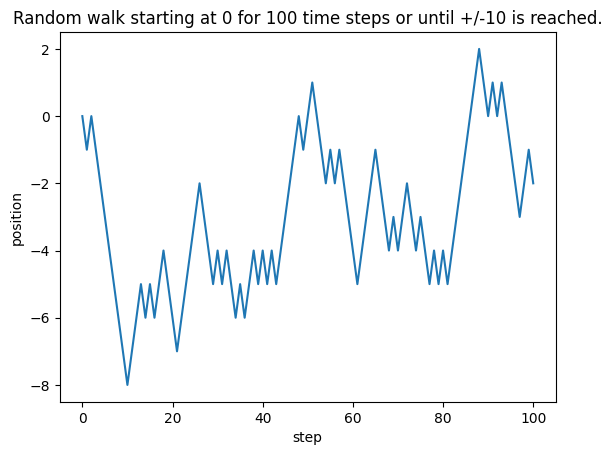

In [3]:
# Defining the probability to move up (probability to move down is (1 - probability))
probability = .5

# Defining the starting position 
bias = 0
positions = [bias]

# Defining the maximum number of steps
n_steps = 100

# Defining the threshold of the walk
threshold = 10

# Creating a list of random numbers to decide the direction of the walk
random_list = np.random.random(n_steps)
direction = [1 if i < probability else -1 for i in random_list]

# Bounds the walk at +/-threshold
for dr in direction:
    positions.append(positions[-1] + dr)
    if positions[-1] > threshold or positions[-1] < -threshold:
        break

# plotting down the graph of the random walk in 1D
plt.plot(positions)
plt.xlabel('step')
plt.ylabel('position')
plt.title(f'Random walk starting at {bias} for {n_steps} time steps or until +/-{threshold} is reached.')
plt.show()

### Random Walk in the context of DDM

Within a DDM the noise parameter is a random walk - and a higher value of noise means taking bigger steps. When we add a drift rate that adds a non-random motion component, so the drift rate moves the walk in a particular direction. You can think of drift rate as accumulating signal, with noise added on top as a random component.

#### Exercise 2{exercise}

Add a constant drift rate to the above implementation of a random walk and observe how it changes the behavior of the random walk. Experiment with different values of the drift rate and observe how it influences the behavior of the random walk.

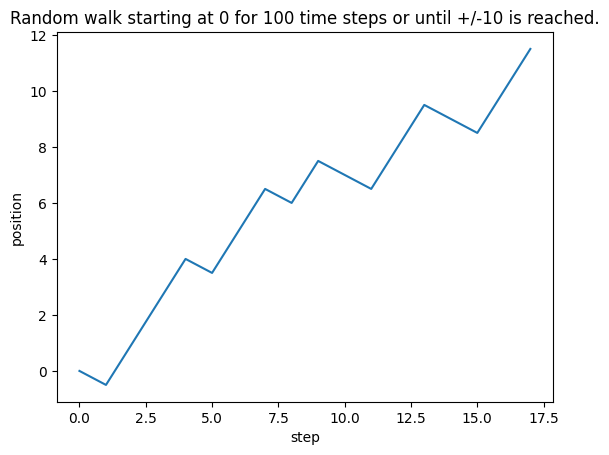

In [5]:
# Defining the probability to move up (probability to move down is 1 - prob)
probability = .5

# Defining the starting position 
bias = 0
positions = [bias]

# Defining the maximum number of steps
n_steps = 100

# Defining the threshold of the walk
threshold = 10

# Defining the drift rate (constant drift in one direction)
drift_rate =  .5 # TODO: Your code here

# Creating a list of random numbers to decide the direction of the walk
random_list = np.random.random(n_steps)
direction = [1 if i < probability else -1 for i in random_list]

# Adjust your random walk to include the drift rate
for dr in direction:
    positions.append(positions[-1] + dr + drift_rate)
    if positions[-1] > threshold or positions[-1] < -threshold:
        break
    # TODO: Your code here

# plotting down the graph of the random walk in 1D
plt.plot(positions)
plt.xlabel('step')
plt.ylabel('position')
plt.title(f'Random walk starting at {bias} for {n_steps} time steps or until +/-{threshold} is reached.')
plt.show()

Solution 2{solution}

```python
# Defining the probability to move up (probability to move down is 1 - prob)
probability = .5
 
# Defining the starting position 
bias = 0
positions = [bias]

# Defining the maximum number of steps
n_steps = 100

# Defining the threshold of the walk
threshold = 10

# Defining the drift rate (constant drift in one direction)
drift_rate = .1  # play with this value to see how it influences the behavior of the random walk, also try negative values

# Creating a list of random numbers to decide the direction of the walk
random_list = np.random.random(n_steps)
direction = [1 if i < probability else -1 for i in random_list]
 
# Bounds the walk at +/-threshold
for dr in direction:
    positions.append(positions[-1] + dr + drift_rate)  # add the drift rate to the position
    if positions[-1] > threshold or positions[-1] < -threshold:
        break
 

# plotting down the graph of the random walk in 1D
plt.plot(positions)
plt.xlabel('step')
plt.ylabel('position')
plt.title(f'Random walk starting at {bias} for {n_steps} time steps or until +/-{threshold} is reached.') 
plt.show()
```

## Drift Diffusion Model in PsyNeuLink

The input to a DDM reflects the stimulus, which can be neutral or provide evidence in favor of a decision - evidence that accumulates over successive time steps.  

Imagine the experiment in which subjects described above where have to respond with one of two buttons. They click the "l" button if they see more dots moving to the left, they click the "r" button if they see more dots moving to the right. 

Your integrator will get evidence from the visual system about the movement direction of dots on the screen. Since DDMs model two choice decisions, we can model left moving dots as evidence towards the L-boundary. Let's assume the L-boundary is above the starting point (aka positive bound) and the R-boundary is below the starting point (aka negative bound).

Let's now assume a trial where most dots are moving to the left. The valence of the stimulus determines which direction the integrator drifts. Positive evidence (aka a dot moving to the left) drifts towards the L-boundary, negative evidence drifts towards the R boundary.

For simplicity, we can assume that the visual system "samples" one dot at a time. Here, are a few concrete examples of how the integrator might work in different situations:

1. All dots are moving to the left:
The visual system samples the following sequence of evidence: `[1, 1, 1, 1, 1]`

2. All dots are moving to the right:
The visual system samples the following sequence of evidence: `[-1, -1, -1, -1, -1]`

3. 70% of the dots are moving to the left, 30% to the right:
A possible sequence of evidence the visual might sample: `[1, -1, 1, -1, 1]`

#### Exercise 3{exercise}

Think about these questions as you go through the exercises. If you don't know the answer to any of the questions, see if the following exercises help you understand the answers better.

1. Tasks vary in difficulty. Under what task conditions would it be most realistic for your DDM to have a high drift rate?  What about a low drift rate?  
2. Assuming that you are modeling lots of individual trials, which kind of integrator would most likely produce the single fastest response time (minimum of all response times): A integrator with high noise or low noise? Why?
3. How does raising your threshold affect your accuracy? Under which task conditions would it be adaptive to raise your threshold?



Solution 3{solution}

1. A high drift rate is most realistic under conditions where the task is easy. In this case, the evidence in favor of one decision is strong, and the agent can accumulate evidence quickly. A low drift rate is most realistic under conditions where the task is difficult. In this case, the evidence in favor of one decision is weak, and the agent accumulates evidence slowly.
2. An integrator with high noise would most likely produce the single fastest response time. This is because the noise would cause the integrator to reach the decision threshold more quickly. However, with a very high noise, the decision is practically random and not based on the evidence. 
3. Raising your threshold increases your accuracy. It would be adaptive to raise your threshold under conditions where the stakes for getting the answer right is high. For example, if you decide whether to invest a large sum of money in stocks.On the other hand, if a fast decision is more important, you would lower the threshold. For example, if you decide whether to brake to avoid a car accident.

In the following cell, we demonstrate the implementation of a drift diffusion integrator in PsyNeuLink:

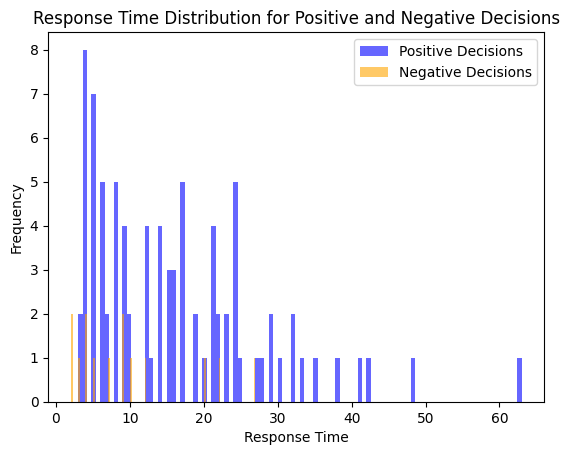

In [6]:
num_trials = 100

# Instate the DDM mechanism
ddm_integrator = pnl.DDM(function=pnl.DriftDiffusionIntegrator(
    noise=.25,
    starting_value=0.0,
    non_decision_time=0.0,
    rate=.05,
    threshold=1.0)
)

# Tell the DDM to store its outputs at each trial
ddm_integrator.log.set_log_conditions(items=[pnl.DECISION_VARIABLE, pnl.RESPONSE_TIME])

# Create a compositions with only the integrator
DDM = pnl.Composition(name='DDM')
DDM.add_node(node=ddm_integrator)

# Run it
DDM.run(inputs={ddm_integrator: 1.}, num_trials=num_trials, context='execid')

# Extract the logged data
log = ddm_integrator.log.nparray_dictionary()['execid']
decision_pos = log[pnl.DECISION_VARIABLE]
time_pos = log[pnl.RESPONSE_TIME]

# For each decision variable, plot the response time frequency
time_pos_pos_decision = time_pos[decision_pos[:, 0] > 0]
time_pos_neg_decision = time_pos[decision_pos[:, 0] < 0]

plt.hist(time_pos_pos_decision, bins=100, alpha=0.6, color='blue', label='Positive Decisions')
plt.hist(time_pos_neg_decision, bins=100, alpha=0.6, color='orange', label='Negative Decisions')

plt.title('Response Time Distribution for Positive and Negative Decisions')
plt.ylabel('Frequency')
plt.xlabel('Response Time')
plt.legend()
plt.show()

The default behaviour of the `DDM` is to execute multiple time steps per call until the threshold is reached. This behavior can be changed by setting the `execute_until_finished` attribute to `False`. Then, the integrator will only execute one time step per call.

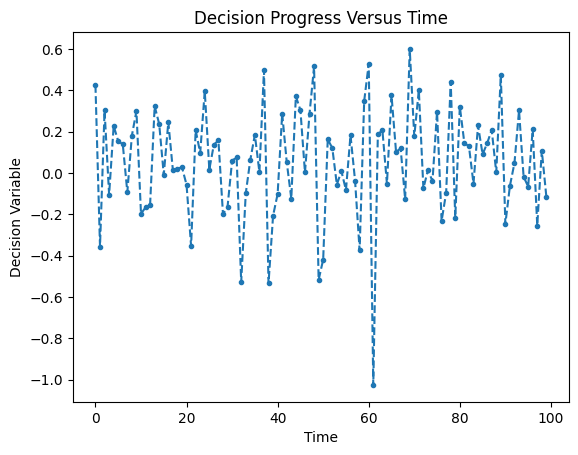

In [7]:
num_trials = 100

# Instate the DDM mechanism with execute_until_finished=False
ddm_integrator_one_step = pnl.DDM(function=pnl.DriftDiffusionIntegrator(
    noise=.25,
    starting_value=0.0,
    non_decision_time=0.0,
    rate=.05,
), execute_until_finished=False)

# Tell the DDM to store its outputs at each trial
ddm_integrator_one_step.log.set_log_conditions(items=[pnl.DECISION_VARIABLE])

# Create a compositions with only the integrator
DDM_one_step = pnl.Composition(name='DDM One Step')
DDM_one_step.add_node(node=ddm_integrator_one_step)

# Run it
DDM_one_step.run(inputs={ddm_integrator_one_step: 1.}, num_trials=num_trials, context='execid')

# Extract the logged data
log = ddm_integrator_one_step.log.nparray_dictionary()['execid']
decision_pos = log[pnl.DECISION_VARIABLE]

# For each time step plot the decision variable
plt.plot(decision_pos[:,0],'.--')
plt.title('Decision Progress Versus Time')
plt.ylabel('Decision Variable')
plt.xlabel('Time')
plt.xticks(np.arange(0,num_trials+1,int(num_trials/5)))
plt.show()

Try changing the `rate` in the above cell to see how it affects the decision-making process. 

You probably would have expected that changing the rate would add a constant drift over time, but the default behavior for a `DDM` is to reset its internal state at the beginning of each trial. This behavior can be changed by setting the `reset_stateful_function_when` attribute to `Never` in the `DriftDiffusionIntegrator` function.

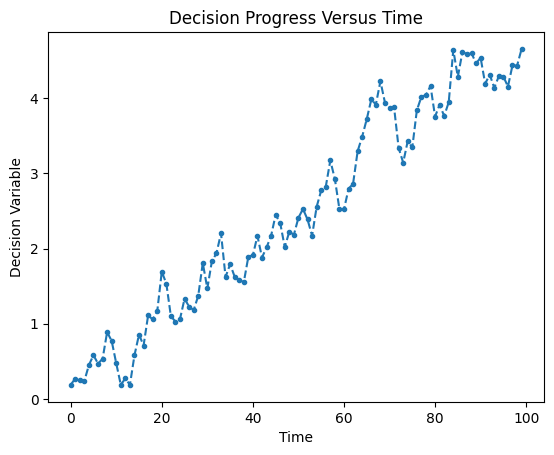

In [10]:
num_trials = 100

# Instate the DDM mechanism with execute_until_finished=False
ddm_integrator_one_step_no_reset = pnl.DDM(function=pnl.DriftDiffusionIntegrator(
    noise=.25,
    starting_value=0.0,
    non_decision_time=0.0,
    rate=.05,
), 
    execute_until_finished=False,
    reset_stateful_function_when=pnl.Never()
)

# Tell the DDM to store its outputs at each trial
ddm_integrator_one_step_no_reset.log.set_log_conditions(items=[pnl.DECISION_VARIABLE])

# Create a compositions with only the integrator
DDM_one_step_no_reset = pnl.Composition(name='DDM One Step no reset')
DDM_one_step_no_reset.add_node(node=ddm_integrator_one_step_no_reset)

# Run it
DDM_one_step_no_reset.run(inputs={ddm_integrator_one_step_no_reset: 1.}, num_trials=num_trials, context='execid')

# Extract the logged data
log = ddm_integrator_one_step_no_reset.log.nparray_dictionary()['execid']
decision_pos = log[pnl.DECISION_VARIABLE]

# For each time step plot the decision variable
plt.plot(decision_pos[:,0],'.--')
plt.title('Decision Progress Versus Time')
plt.ylabel('Decision Variable')
plt.xlabel('Time')
plt.xticks(np.arange(0,num_trials+1,int(num_trials/5)))
plt.show()

The above cell simulates the random walk implemented in the beginning.

### Analytical Solutions to the DDM

PsyNeuLink also allows to calculate the analytic solutions to the DDM described in [Bogacz et al (2006](https://sites.engineering.ucsb.edu/~moehlis/moehlis_papers/psych.pdf). The `DriftDiffusionAnalytical` function can be used to calculate the analytic solutions to the DDM. The function returns the `DECISION_VARIABLE`, `RESPONSE_TIME`, accuracy, and (`PROBABILITY_UPPER_THRESHOLD` error rate (`PROBABIILITY_LOWER_THRESHOLD`. It also returns the moments (mean, variance, and skew) for conditional (correct/positive or incorrect/negative) response time distributions (`RT_CORRECT_MEAN`, `RT_CORRECT_VARIANCE`, `RT_CORRECT_SKEW`).

Here, we will use an additional pacakge `scipy` to plot the probability density function of the response time distributions.

In [12]:
%%capture
%pip install scipy

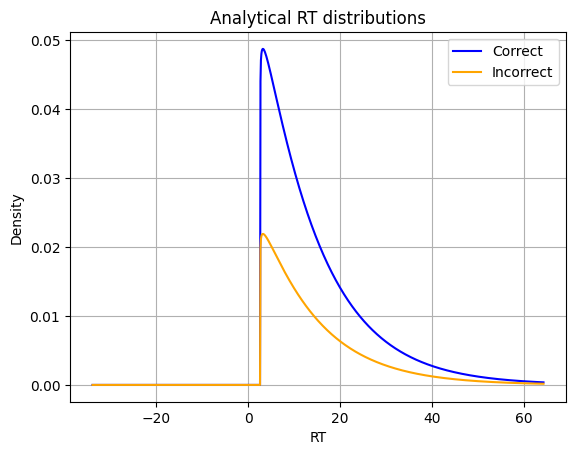

In [14]:
from scipy.stats import pearson3
num_trials = 1

# Instate the DDM mechanism
ddm_integrator = pnl.DDM(function=pnl.DriftDiffusionAnalytical(
    noise=.25,
    starting_value=0.0,
    non_decision_time=0.0,
    drift_rate=.05,
    threshold=1.0),
    output_ports=[pnl.PROBABILITY_UPPER_THRESHOLD, pnl.PROBABILITY_LOWER_THRESHOLD, pnl.RT_CORRECT_MEAN, pnl.RT_CORRECT_VARIANCE, pnl.RT_CORRECT_SKEW, pnl.RT_INCORRECT_MEAN, pnl.RT_INCORRECT_VARIANCE, pnl.RT_INCORRECT_SKEW]
)

# Create a compositions with only the integrator
DDM = pnl.Composition(name='DDM')
DDM.add_node(node=ddm_integrator)

# Run it
DDM.run(inputs={ddm_integrator: .5}, num_trials=num_trials, context='execid')

# Extract the data (here we access the values directly)
# vals = DDM.parameters.value
probability_correct = ddm_integrator.output_ports[pnl.PROBABILITY_UPPER_THRESHOLD].value[0]
probability_incorrect = ddm_integrator.output_ports[pnl.PROBABILITY_LOWER_THRESHOLD].value[0]

rt_correct_mean = ddm_integrator.output_ports[pnl.RT_CORRECT_MEAN].value[0]
rt_correct_variance = ddm_integrator.output_ports[pnl.RT_CORRECT_VARIANCE].value[0]
rt_correct_skew = ddm_integrator.output_ports[pnl.RT_CORRECT_SKEW].value[0]
rt_correct_std = np.sqrt(rt_correct_variance)

rt_incorrect_mean = ddm_integrator.output_ports[pnl.RT_INCORRECT_MEAN].value[0]
rt_incorrect_variance = ddm_integrator.output_ports[pnl.RT_INCORRECT_VARIANCE].value[0]
rt_incorrect_skew = ddm_integrator.output_ports[pnl.RT_INCORRECT_SKEW].value[0]
rt_incorrect_std = np.sqrt(rt_incorrect_variance)

# Generate the Pearson Type III distributions
x_correct = np.linspace(rt_correct_mean - 4 * rt_correct_std, rt_correct_mean + 4 * rt_correct_std, 1000)
pdf_correct = pearson3.pdf(x_correct, rt_correct_skew, loc=rt_correct_mean, scale=rt_correct_std) * probability_correct

x_incorrect = np.linspace(rt_incorrect_mean - 4 * rt_incorrect_std, rt_incorrect_mean + 4 * rt_incorrect_std, 1000)
pdf_incorrect = pearson3.pdf(x_incorrect, rt_incorrect_skew, loc=rt_incorrect_mean, scale=rt_incorrect_std) * probability_incorrect

# Plot the distribution
plt.plot(x_correct, pdf_correct, label=f'Correct', color='blue')
plt.plot(x_incorrect, pdf_incorrect, label=f'Incorrect', color='orange')
plt.title('Analytical RT distributions')
plt.xlabel('RT')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

#### Exercise 4{exercise}

Why did we use `num_trials = 1` in th above cell? What would happen if we set `num_trials = 100`?

Solution 4{solution}

This is an analytical solution for the DDM which means we are expecting the exact same output for each trial. Running the DDM for multiple trials would not change the output. We would get the same output for each trial. This is why we use `num_trials = 1` in this case. As output we get the moments of the response time distributions an not (as in `DriftDiffusionIntegrater`) a single decision and reaction time.

#### Exercise 5{exercise}

How do the parameters of the DDM map on to reaction times in lab experiments and real life decision-making?

Here, we work with hypothetical experimental data from two experiments (A and B). Each experiment has two conditions (1 and 2). The task was a [2AFC task](#the-two-alternative-forced-choice-2afc-tafc-task) as described earlier. The subjects had to respond to the direction of moving stimuli.

---

**Experiment : Penalty Manipulation**

1. In the *zero penalty* condition, subjects got no penalties for wrong answers.
2. In the *high penalty* condition, subjects got a penalty for responding incorrectly.

---

**Experiment 2: Coherence Manipulation**

1. In the *high coherence* condition, subjects saw stimuli with high *coherence* (most dots moved in the same direction).
2. In the *low coherence* condition subjects saw stimuli with low coherence(most dots moved randomly and only a few of them moved in the target direction).

---

Here, you see the reaction time distributions for the two experiments:

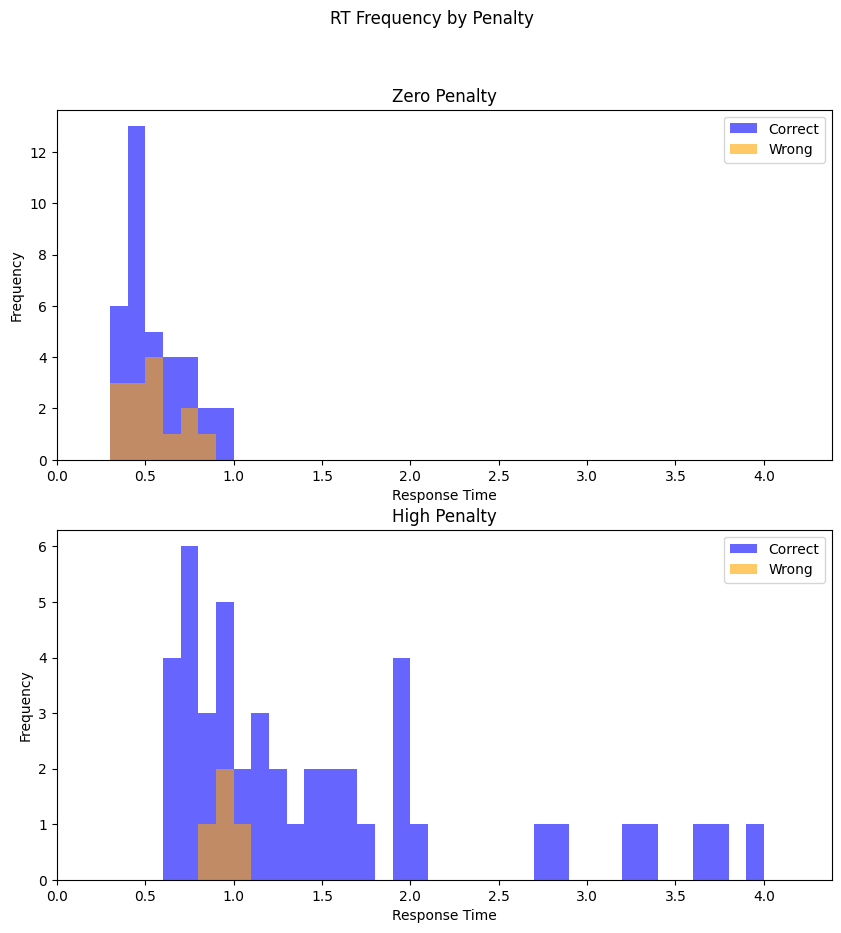

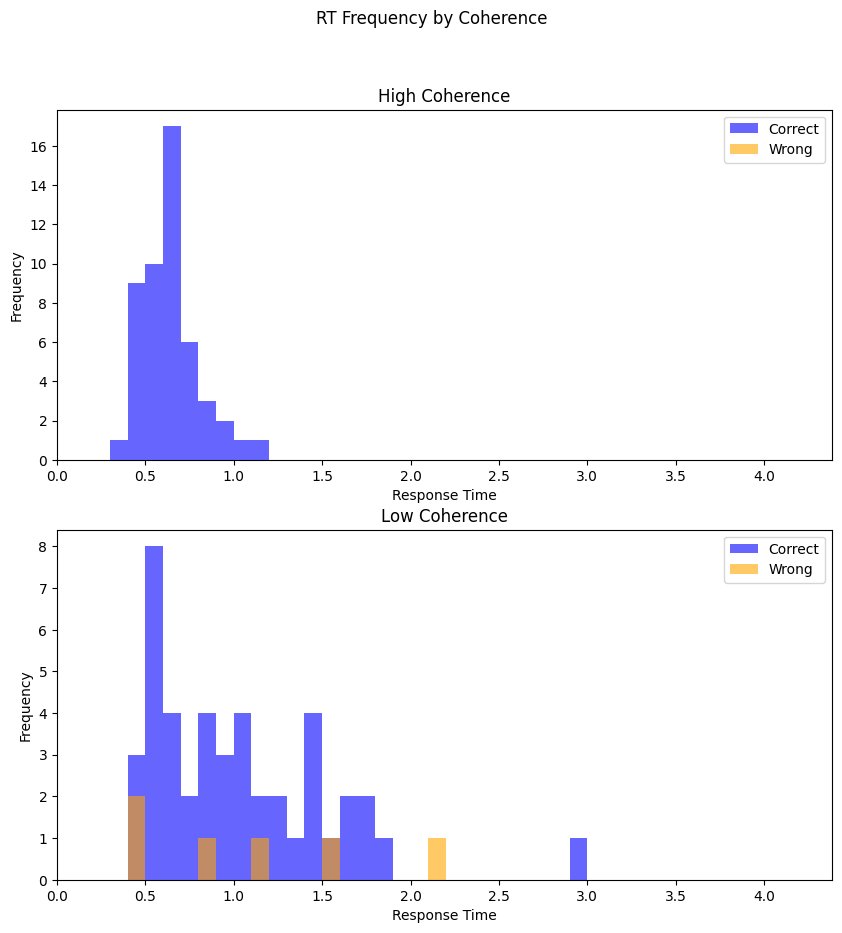

In [15]:
# Paths to the data
penalties_path = "https://github.com/younesStrittmatter/502B/raw/refs/heads/main/data/drift_diffusion_models/penalties.pkl"
coherence_path = "https://github.com/younesStrittmatter/502B/raw/refs/heads/main/data/drift_diffusion_models/coherence.pkl"

    
# Load and prepare the data for Experiment A
penalties_df = pd.read_pickle(penalties_path)
max_rt = penalties_df.rt.max()

# Filter the data
# Low penalties
penalties_zero_penalty_df = penalties_df[penalties_df.condition == 'ZeroPenalty']
# Correct
rt_zero_penalty_correct = penalties_zero_penalty_df.rt[penalties_zero_penalty_df.response == 1]
# Incorrect
rt_zero_penalty_incorrect = penalties_zero_penalty_df.rt[penalties_zero_penalty_df.response == 0]

# High penalties
penalties_high_penalty_df = penalties_df[penalties_df.condition == 'HighPenalty']
# Correct
rt_high_penalty_correct = penalties_high_penalty_df.rt[penalties_high_penalty_df.response == 1]
# Incorrect
rt_high_penalty_incorrect = penalties_high_penalty_df.rt[penalties_high_penalty_df.response == 0]

# Load and prepare the data for Experiment B
coherence_df = pd.read_pickle(coherence_path)

# Filter the data
# High coherence
coherence_high_coherence_df = coherence_df[coherence_df.condition == 'HighCoherence']
# Correct
rt_high_coherence_correct = coherence_high_coherence_df.rt[coherence_high_coherence_df.response == 1]
# Incorrect
rt_high_coherence_incorrect = coherence_high_coherence_df.rt[coherence_high_coherence_df.response == 0]

# Low coherence
coherence_low_coherence_df = coherence_df[coherence_df.condition == 'LowCoherence']
# Correct
rt_low_coherence_correct = coherence_low_coherence_df.rt[coherence_low_coherence_df.response == 1]
# Incorrect
rt_low_coherence_incorrect = coherence_low_coherence_df.rt[coherence_low_coherence_df.response == 0]


# This function is used to plot the RT distributions
def plot_rt_distributions(rt_correct, rt_incorrect, ax, title, x_max=5):
    bins = [i * .1 for i in range(int(x_max / .1) + 1)]
    ax.hist(rt_correct, bins=bins, alpha=0.6, color='blue', label='Correct')
    ax.hist(rt_incorrect, bins=bins, alpha=0.6, color='orange', label='Wrong')
    ax.set_xlim(0, x_max)
    ax.set_title(title)
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Response Time')
    ax.legend()
    
# Plot the RT distributions for Experiment A
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('RT Frequency by Penalty')
plot_rt_distributions(rt_zero_penalty_correct, rt_zero_penalty_incorrect, axs[0], 'Zero Penalty', max_rt)
plot_rt_distributions(rt_high_penalty_correct, rt_high_penalty_incorrect, axs[1], 'High Penalty', max_rt)
plt.show()

# Plot the RT distributions for Experiment B
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('RT Frequency by Coherence')
plot_rt_distributions(rt_high_coherence_correct, rt_high_coherence_incorrect, axs[0], 'High Coherence', max_rt)
plot_rt_distributions(rt_low_coherence_correct, rt_low_coherence_incorrect, axs[1], 'Low Coherence', max_rt)
plt.show()

**Exercise 5a**

Build a single path integrator (not analytic) that corresponds to the zero penalty condition in Experiment A (A1). Then build the analogue for the other condition by changing only one parameter of the `DriftDiffusionIntegrator`. Run the integrators for 100 trials and plot the resulting RT distributions.

**Note:** The goal is not to fit the data exactly but to understand how the parameters influence the RT distributions and how to get qualitatively similar results. It is not important that the absolute values of the RT distributions match the data but that you can reproduce the general differences in RT distributions between the two conditions.

Hint 1{hint}

The general difference between the two conditions in Experiment A is that the RTs where higher and that the error rate was lower.

Hint 2{hint}

You can start with the following code snippet that builds the integrator for the zero penalty condition in Experiment A (A1). You can then modify this code to build the integrator for the high penalty condition in Experiment A (A2).

```python
num_trials = 100

# Instate the DDM mechanism
ddm_integrator_a1 = pnl.DDM(function=pnl.DriftDiffusionIntegrator(
    noise=.25,
    starting_value=0.0,
    non_decision_time=0.0,
    rate=.05,
    threshold=.5)
)

# Tell the DDM to store its outputs at each trial
ddm_integrator_a1.log.set_log_conditions(items=[pnl.DECISION_VARIABLE, pnl.RESPONSE_TIME])

# Create a compositions with only the integrator
DDM_a1 = pnl.Composition(name='DDM A1')
DDM_a1.add_node(node=ddm_integrator_a1)

# Run it
DDM_a1.run(inputs={ddm_integrator_a1: 1.}, num_trials=num_trials, context='execid')

# Extract the logged data
log = ddm_integrator_a1.log.nparray_dictionary()['execid']
decision_pos = log[pnl.DECISION_VARIABLE]
time_pos = log[pnl.RESPONSE_TIME] / 5. # Here, we divide by 5 to get a better fit

# For each decision variable, plot the response time frequency
time_pos_pos_decision = time_pos[decision_pos[:, 0] > 0]
time_pos_neg_decision = time_pos[decision_pos[:, 0] < 0]

max_rt = time_pos.max()

# Plot the RT distributions for Experiment A1
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_rt_distributions(time_pos_pos_decision, time_pos_neg_decision, ax, 'Experiment A1', max_rt)
plt.show()
```

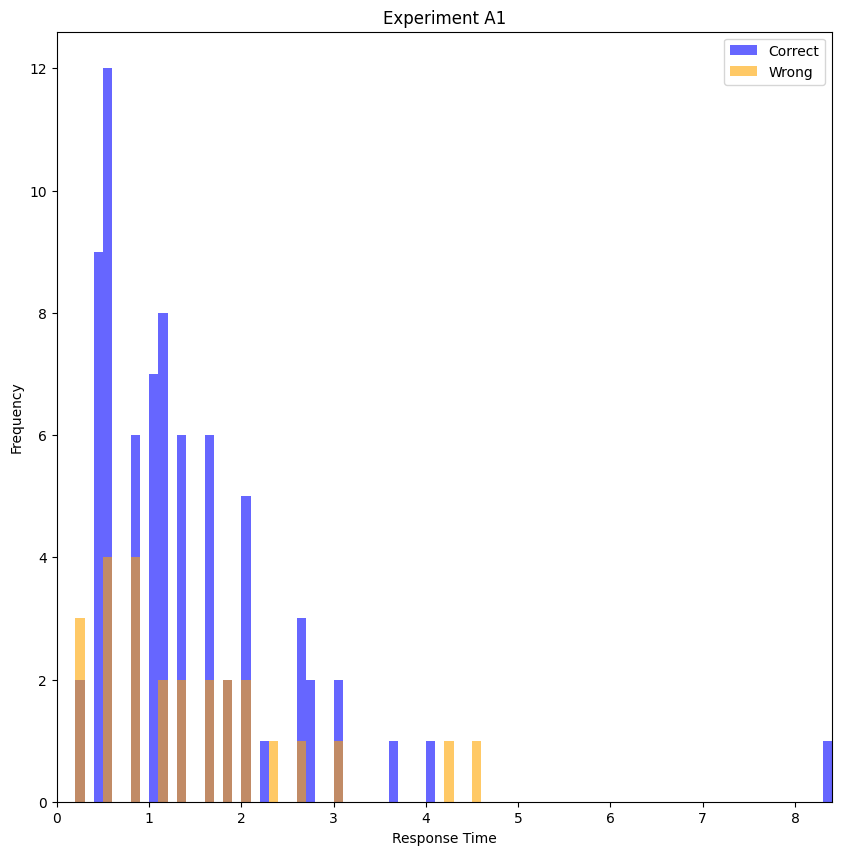

In [16]:
num_trials = 100

# Instate the DDM mechanism
ddm_integrator_a1 = pnl.DDM(function=pnl.DriftDiffusionIntegrator(
    noise=.25,
    starting_value=0.0,
    non_decision_time=0.0,
    rate=.05,
    threshold=.5)
)

# Tell the DDM to store its outputs at each trial
ddm_integrator_a1.log.set_log_conditions(items=[pnl.DECISION_VARIABLE, pnl.RESPONSE_TIME])

# Create a compositions with only the integrator
DDM_a1 = pnl.Composition(name='DDM A1')
DDM_a1.add_node(node=ddm_integrator_a1)

# Run it
DDM_a1.run(inputs={ddm_integrator_a1: 1.}, num_trials=num_trials, context='execid')

# Extract the logged data
log = ddm_integrator_a1.log.nparray_dictionary()['execid']
decision_pos = log[pnl.DECISION_VARIABLE]
time_pos = log[pnl.RESPONSE_TIME] / 5. # Here, we divide by 5 to get a better fit

# For each decision variable, plot the response time frequency
time_pos_pos_decision = time_pos[decision_pos[:, 0] > 0]
time_pos_neg_decision = time_pos[decision_pos[:, 0] < 0]

max_rt = time_pos.max()

# Plot the RT distributions for Experiment A1
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_rt_distributions(time_pos_pos_decision, time_pos_neg_decision, ax, 'Experiment A1', max_rt)
plt.show()

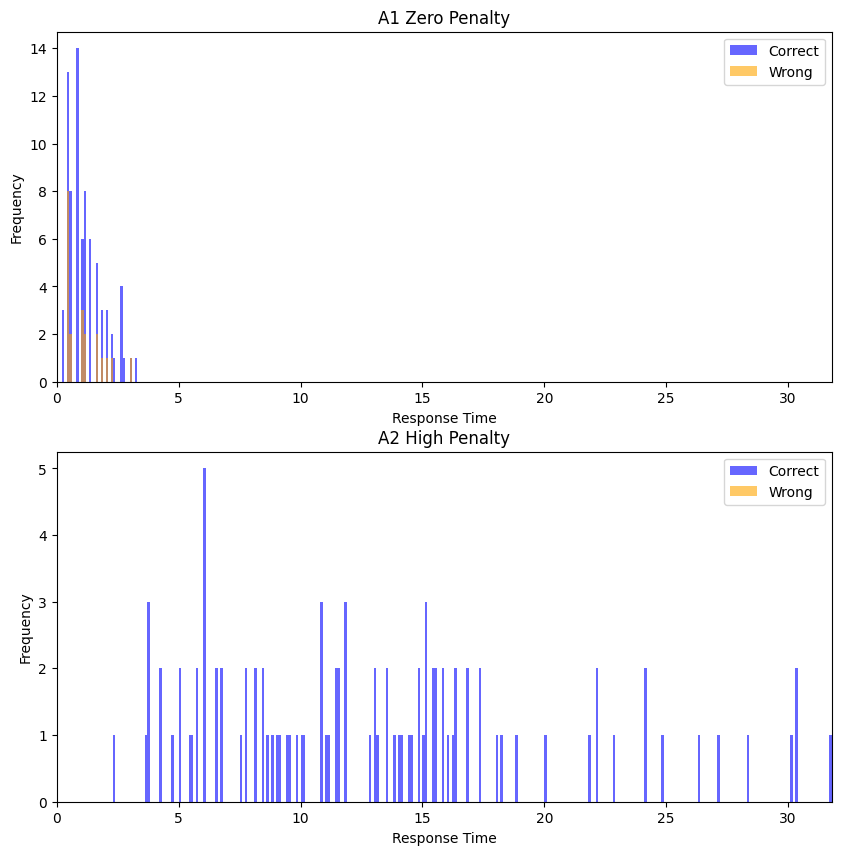

In [21]:
num_trials = 100

## Experiment A1 - Zero Penalty
# Instate the DDM mechanism for Experiment A1
ddm_integrator_a1 = pnl.DDM(function=pnl.DriftDiffusionIntegrator(
    noise=.25,
    starting_value=0.0,
    non_decision_time=0.0,
    rate=.05,
    threshold=.5)
)

# Tell the DDM to store its outputs at each trial
ddm_integrator_a1.log.set_log_conditions(items=[pnl.DECISION_VARIABLE, pnl.RESPONSE_TIME])

# Create a compositions with only the integrator
DDM_a1 = pnl.Composition(name='DDM A1')
DDM_a1.add_node(node=ddm_integrator_a1)


## Experiment A2 - High Penalty
# Instate the DDM mechanism for Experiment A2
ddm_integrator_a2 = pnl.DDM(function=pnl.DriftDiffusionIntegrator(
    noise=.25,
    starting_value=0.0,
    non_decision_time=0.0,
    rate=.05,
    threshold=3.)  # Here, we manipulate the threshold. All other parameters are the same as in A1
)

# Tell the DDM to store its outputs at each trial
ddm_integrator_a2.log.set_log_conditions(items=[pnl.DECISION_VARIABLE, pnl.RESPONSE_TIME])

# Create a compositions with only the integrator
DDM_a2 = pnl.Composition(name='DDM A2')
DDM_a2.add_node(node=ddm_integrator_a2)

# 
# # Run both integrators
DDM_a1.run(inputs={ddm_integrator_a1: 1.}, num_trials=num_trials, context='execid')
DDM_a2.run(inputs={ddm_integrator_a2: 1.}, num_trials=num_trials, context='execid')
# 
# Extract the logged data
log_a1 = ddm_integrator_a1.log.nparray_dictionary()['execid']
decision_pos_a1 = log_a1[pnl.DECISION_VARIABLE]
time_pos_a1 = log_a1[pnl.RESPONSE_TIME] / 5. # Here, we divide by 5 to get a better fit

# For each decision variable, plot the response time frequency
time_pos_pos_decision_a1 = time_pos_a1[decision_pos_a1[:, 0] > 0]
time_pos_neg_decision_a1 = time_pos_a1[decision_pos_a1[:, 0] < 0]

log_a2 = ddm_integrator_a2.log.nparray_dictionary()['execid']
decision_pos_a2 = log_a2[pnl.DECISION_VARIABLE]
time_pos_a2 = log_a2[pnl.RESPONSE_TIME] / 5. # Here, we divide by 5 to get a better fit

# For each decision variable, plot the response time frequency
time_pos_pos_decision_a2 = time_pos_a2[decision_pos_a2[:, 0] > 0]
time_pos_neg_decision_a2 = time_pos_a2[decision_pos_a2[:, 0] < 0]

max_rt = max(time_pos_a1.max(), time_pos_a2.max())


# Plot the RT distributions for Experiment A1
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
plot_rt_distributions(time_pos_pos_decision_a1, time_pos_neg_decision_a1, axs[0], 'A1 Zero Penalty', max_rt)
plot_rt_distributions(time_pos_pos_decision_a2, time_pos_neg_decision_a2, axs[1], 'A2 High Penalty', max_rt)
plt.show()

Solution 5a{solution}

```python
num_trials = 100

## Experiment A1 - Zero Penalty
# Instate the DDM mechanism for Experiment A1
ddm_integrator_a1 = pnl.DDM(function=pnl.DriftDiffusionIntegrator(
    noise=.25,
    starting_value=0.0,
    non_decision_time=0.0,
    rate=.05,
    threshold=.5)
)

# Tell the DDM to store its outputs at each trial
ddm_integrator_a1.log.set_log_conditions(items=[pnl.DECISION_VARIABLE, pnl.RESPONSE_TIME])

# Create a compositions with only the integrator
DDM_a1 = pnl.Composition(name='DDM A1')
DDM_a1.add_node(node=ddm_integrator_a1)


## Experiment A2 - High Penalty
# Instate the DDM mechanism for Experiment A2
ddm_integrator_a2 = pnl.DDM(function=pnl.DriftDiffusionIntegrator(
    noise=.25,
    starting_value=0.0,
    non_decision_time=0.0,
    rate=.05,
    threshold=3.)  # Here, we manipulate the threshold. All other parameters are the same as in A1
)

# Tell the DDM to store its outputs at each trial
ddm_integrator_a2.log.set_log_conditions(items=[pnl.DECISION_VARIABLE, pnl.RESPONSE_TIME])

# Create a compositions with only the integrator
DDM_a2 = pnl.Composition(name='DDM A2')
DDM_a2.add_node(node=ddm_integrator_a2)

# 
# # Run both integrators
DDM_a1.run(inputs={ddm_integrator_a1: 1.}, num_trials=num_trials, context='execid')
DDM_a2.run(inputs={ddm_integrator_a2: 1.}, num_trials=num_trials, context='execid')
# 
# Extract the logged data
log_a1 = ddm_integrator_a1.log.nparray_dictionary()['execid']
decision_pos_a1 = log_a1[pnl.DECISION_VARIABLE]
time_pos_a1 = log_a1[pnl.RESPONSE_TIME] / 5. # Here, we divide by 5 to get a better fit

# For each decision variable, plot the response time frequency
time_pos_pos_decision_a1 = time_pos_a1[decision_pos_a1[:, 0] > 0]
time_pos_neg_decision_a1 = time_pos_a1[decision_pos_a1[:, 0] < 0]

log_a2 = ddm_integrator_a2.log.nparray_dictionary()['execid']
decision_pos_a2 = log_a2[pnl.DECISION_VARIABLE]
time_pos_a2 = log_a2[pnl.RESPONSE_TIME] / 5. # Here, we divide by 5 to get a better fit

# For each decision variable, plot the response time frequency
time_pos_pos_decision_a2 = time_pos_a2[decision_pos_a2[:, 0] > 0]
time_pos_neg_decision_a2 = time_pos_a2[decision_pos_a2[:, 0] < 0]

max_rt = max(time_pos_a1.max(), time_pos_a2.max())


# Plot the RT distributions for Experiment A1
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
plot_rt_distributions(time_pos_pos_decision_a1, time_pos_neg_decision_a1, axs[0], 'A1 Zero Penalty', max_rt)
plot_rt_distributions(time_pos_pos_decision_a2, time_pos_neg_decision_a2, axs[1], 'A2 High Penalty', max_rt)
plt.show()
```

Exercise 5b

Repeat the same process for Experiment B. Build the integrators for the high and low coherence conditions (B1 and B2) and run them for 100 trials. Plot the resulting RT distributions.

Hint{hint}

The general difference between the two conditions is that in the high coherence condition the participants are faster and more accurate.

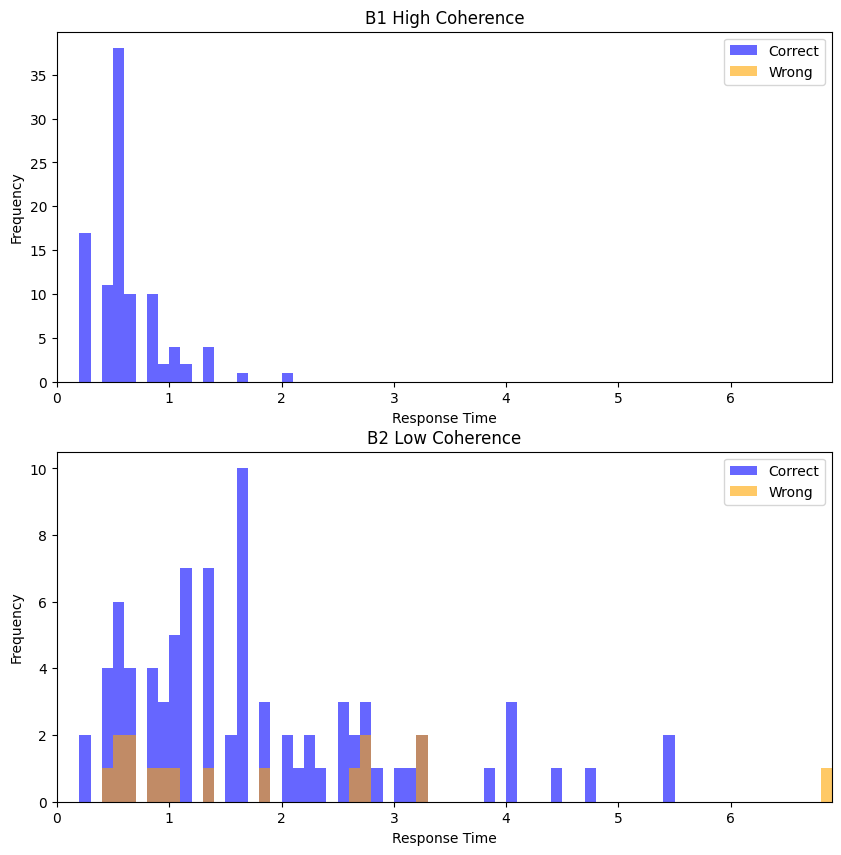

In [18]:
num_trials = 100

## Experiment B1 - High Coherence
# Instate the DDM mechanism for Experiment b1
ddm_integrator_b1 = pnl.DDM(function=pnl.DriftDiffusionIntegrator(
    noise=.25,
    starting_value=0.0,
    non_decision_time=0.0,
    rate=.2,  # Here, we manipulate the drift rate
    threshold=1.)
)

# Tell the DDM to store its outputs at each trial
ddm_integrator_b1.log.set_log_conditions(items=[pnl.DECISION_VARIABLE, pnl.RESPONSE_TIME])

# Create a compositions with only the integrator
DDM_b1 = pnl.Composition(name='DDM B1')
DDM_b1.add_node(node=ddm_integrator_b1)


## Experiment B2 - Low Coherence
# Instate the DDM mechanism for Experiment B2
ddm_integrator_b2 = pnl.DDM(function=pnl.DriftDiffusionIntegrator(
    noise=.25,
    starting_value=0.0,
    non_decision_time=0.0,
    rate=.05,
    threshold=1.)  
)

# Tell the DDM to store its outputs at each trial
ddm_integrator_b2.log.set_log_conditions(items=[pnl.DECISION_VARIABLE, pnl.RESPONSE_TIME])

# Create a compositions with only the integrator
DDM_b2 = pnl.Composition(name='DDM B2')
DDM_b2.add_node(node=ddm_integrator_b2)

# 
# # Run both integrators
DDM_b1.run(inputs={ddm_integrator_b1: 1.}, num_trials=num_trials, context='execid')
DDM_b2.run(inputs={ddm_integrator_b2: 1.}, num_trials=num_trials, context='execid')
# 
# Extract the logged data
log_b1 = ddm_integrator_b1.log.nparray_dictionary()['execid']
decision_pos_b1 = log_b1[pnl.DECISION_VARIABLE]
time_pos_b1 = log_b1[pnl.RESPONSE_TIME] / 10. # Here, we divide by 10 to get a better fit

# For each decision variable, plot the response time frequency
time_pos_pos_decision_b1 = time_pos_b1[decision_pos_b1[:, 0] > 0]
time_pos_neg_decision_b1 = time_pos_b1[decision_pos_b1[:, 0] < 0]

log_b2 = ddm_integrator_b2.log.nparray_dictionary()['execid']
decision_pos_b2 = log_b2[pnl.DECISION_VARIABLE]
time_pos_b2 = log_b2[pnl.RESPONSE_TIME] / 10. # Here, we divide by 10 to get a better fit

# For each decision variable, plot the response time frequency
time_pos_pos_decision_b2 = time_pos_b2[decision_pos_b2[:, 0] > 0]
time_pos_neg_decision_b2 = time_pos_b2[decision_pos_b2[:, 0] < 0]

max_rt = max(time_pos_b1.max(), time_pos_b2.max())


# Plot the RT distributions for Experiment b1
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
plot_rt_distributions(time_pos_pos_decision_b1, time_pos_neg_decision_b1, axs[0], 'B1 High Coherence', max_rt)
plot_rt_distributions(time_pos_pos_decision_b2, time_pos_neg_decision_b2, axs[1], 'B2 Low Coherence', max_rt)
plt.show()

Solution 5b{solution}

```python
num_trials = 100

## Experiment B1 - High Coherence
# Instate the DDM mechanism for Experiment b1
ddm_integrator_b1 = pnl.DDM(function=pnl.DriftDiffusionIntegrator(
    noise=.25,
    starting_value=0.0,
    non_decision_time=0.0,
    rate=.2,  # Here, we manipulate the drift rate
    threshold=1.)
)

# Tell the DDM to store its outputs at each trial
ddm_integrator_b1.log.set_log_conditions(items=[pnl.DECISION_VARIABLE, pnl.RESPONSE_TIME])

# Create a compositions with only the integrator
DDM_b1 = pnl.Composition(name='DDM B1')
DDM_b1.add_node(node=ddm_integrator_b1)


## Experiment B2 - Low Coherence
# Instate the DDM mechanism for Experiment B2
ddm_integrator_b2 = pnl.DDM(function=pnl.DriftDiffusionIntegrator(
    noise=.25,
    starting_value=0.0,
    non_decision_time=0.0,
    rate=.05,
    threshold=1.)  
)

# Tell the DDM to store its outputs at each trial
ddm_integrator_b2.log.set_log_conditions(items=[pnl.DECISION_VARIABLE, pnl.RESPONSE_TIME])

# Create a compositions with only the integrator
DDM_b2 = pnl.Composition(name='DDM B2')
DDM_b2.add_node(node=ddm_integrator_b2)

# 
# # Run both integrators
DDM_b1.run(inputs={ddm_integrator_b1: 1.}, num_trials=num_trials, context='execid')
DDM_b2.run(inputs={ddm_integrator_b2: 1.}, num_trials=num_trials, context='execid')
# 
# Extract the logged data
log_b1 = ddm_integrator_b1.log.nparray_dictionary()['execid']
decision_pos_b1 = log_b1[pnl.DECISION_VARIABLE]
time_pos_b1 = log_b1[pnl.RESPONSE_TIME] / 10. # Here, we divide by 10 to get a better fit

# For each decision variable, plot the response time frequency
time_pos_pos_decision_b1 = time_pos_b1[decision_pos_b1[:, 0] > 0]
time_pos_neg_decision_b1 = time_pos_b1[decision_pos_b1[:, 0] < 0]

log_b2 = ddm_integrator_b2.log.nparray_dictionary()['execid']
decision_pos_b2 = log_b2[pnl.DECISION_VARIABLE]
time_pos_b2 = log_b2[pnl.RESPONSE_TIME] / 10. # Here, we divide by 10 to get a better fit

# For each decision variable, plot the response time frequency
time_pos_pos_decision_b2 = time_pos_b2[decision_pos_b2[:, 0] > 0]
time_pos_neg_decision_b2 = time_pos_b2[decision_pos_b2[:, 0] < 0]

max_rt = max(time_pos_b1.max(), time_pos_b2.max())


# Plot the RT distributions for Experiment b1
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
plot_rt_distributions(time_pos_pos_decision_b1, time_pos_neg_decision_b1, axs[0], 'B1 High Coherence', max_rt)
plot_rt_distributions(time_pos_pos_decision_b2, time_pos_neg_decision_b2, axs[1], 'B2 Low Coherence', max_rt)
plt.show()
```